In [25]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [2]:
marathon_2016_df = pd.read_csv('../data/marathon_2016.csv')
marathon_2016_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,1,Scott Wietecha,02:25:42
1,1,2,3,Brian Shelton,02:34:43
2,2,3,1047,Christopher Capps,02:38:43
3,3,4,1052,Jason Grimes,02:45:06
4,4,5,1046,David Adams,02:47:28


In [3]:
marathon_2017_df = pd.read_csv('../data/marathon_2017.csv')
marathon_2017_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,1,Scott Wietecha,02:40:25
1,1,2,1145,Ryan Regnier,02:56:28
2,2,3,1147,Daniel Everett,03:00:55
3,3,4,1029,Khris Vickroy,03:04:47
4,4,5,1119,Marcus Dilallo,03:04:53


In [4]:
marathon_2018_df = pd.read_csv('../data/marathon_2018.csv')
marathon_2018_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,1,Scott Wietecha,02:28:16
1,1,2,3,Garang Madut,02:29:52
2,2,3,33442,Kevin Fink,02:38:59
3,3,4,33441,Andrew Hodges,02:43:59
4,4,5,30028,Nicholas Aubert,02:48:11


In [5]:
marathon_2019_df = pd.read_csv('../data/marathon_2019.csv')
marathon_2019_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,30001,Travis Peruski,01:37:54
1,1,2,1,Scott Wietecha,02:34:59
2,2,3,4,Jordan Wilson,02:35:24
3,3,4,30034,Steelton Flynn,02:39:59
4,4,5,30035,Thomas Ellis,02:42:09


In [6]:
marathon_df = pd.concat([marathon_2016_df, marathon_2017_df, marathon_2018_df, marathon_2019_df])
marathon_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,1,Scott Wietecha,02:25:42
1,1,2,3,Brian Shelton,02:34:43
2,2,3,1047,Christopher Capps,02:38:43
3,3,4,1052,Jason Grimes,02:45:06
4,4,5,1046,David Adams,02:47:28


In [7]:
half_marathon_2019_df = pd.read_csv('../data/half_marathon_2019.csv')
half_marathon_2019_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,31,Nick French,01:10:03
1,1,2,33,Ian Bordelon,01:12:15
2,2,3,32,Chris Demetra,01:12:52
3,3,4,1025,Grayson Reid,01:15:10
4,4,5,34,Jason Vincze,01:17:01


In [8]:
half_marathon_2018_df = pd.read_csv('../data/half_marathon_2018.csv')
half_marathon_2018_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,103,Roosevelt Cook,01:09:25
1,1,2,107,Lucas Cotter,01:09:51
2,2,3,105,Nick French,01:10:38
3,3,4,106,Jason Vincze,01:11:50
4,4,5,104,Joseph Elsakr,01:13:28


In [9]:
half_marathon_2017_df = pd.read_csv('../data/half_marathon_2017.csv')
half_marathon_2017_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,202,Tyler Andrews,01:10:58
1,1,2,204,Bill Martin,01:11:25
2,2,3,206,Nick French,01:11:42
3,3,4,201,Roosevelt Cook,01:13:20
4,4,5,1655,Erick Kigen,01:14:56


In [10]:
half_marathon_2016_df = pd.read_csv('../data/half_marathon_2016.csv')
half_marathon_2016_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,201,Roosevelt Cook,01:11:15
1,1,2,204,Bill Martin,01:11:50
2,2,3,1623,Cody Hodgins,01:13:43
3,3,4,1222,Andrew Archer,01:15:04
4,4,5,1224,Brian Syring,01:15:30


In [11]:
half_marathon_df = pd.concat([half_marathon_2016_df, half_marathon_2017_df, half_marathon_2018_df, half_marathon_2019_df])
half_marathon_df.tail()

,Unnamed: 0,Overall,Bib,Name,Time
17231,17231,99999,1014,Ian Bordelon,00:00:00
17232,17232,99999,1012,Nick Gehlsen,00:00:00
17233,17233,99999,6295,Arsenio Franklin,00:00:00
17234,17234,99999,4922,Matt Lang,00:00:00
17235,17235,99999,1528,Kyle Eason,00:00:00


In [12]:
half_marathon_df['Time'] = pd.to_datetime(half_marathon_df['Time'])

In [13]:
half_marathon_df['Time'] = (half_marathon_df['Time']).dt.time

In [14]:
half_marathon_df.head()

,Unnamed: 0,Overall,Bib,Name,Time
0,0,1,201,Roosevelt Cook,01:11:15
1,1,2,204,Bill Martin,01:11:50
2,2,3,1623,Cody Hodgins,01:13:43
3,3,4,1222,Andrew Archer,01:15:04
4,4,5,1224,Brian Syring,01:15:30


In [15]:
half_marathon_df = half_marathon_df[half_marathon_df['Time'] != '00:00:00']
half_marathon_df.tail()


,Unnamed: 0,Overall,Bib,Name,Time
17231,17231,99999,1014,Ian Bordelon,00:00:00
17232,17232,99999,1012,Nick Gehlsen,00:00:00
17233,17233,99999,6295,Arsenio Franklin,00:00:00
17234,17234,99999,4922,Matt Lang,00:00:00
17235,17235,99999,1528,Kyle Eason,00:00:00


In [16]:
last_5 = half_marathon_df.tail()
last_5.head()

,Unnamed: 0,Overall,Bib,Name,Time
17231,17231,99999,1014,Ian Bordelon,00:00:00
17232,17232,99999,1012,Nick Gehlsen,00:00:00
17233,17233,99999,6295,Arsenio Franklin,00:00:00
17234,17234,99999,4922,Matt Lang,00:00:00
17235,17235,99999,1528,Kyle Eason,00:00:00


In [17]:
half_2016_last = half_marathon_2016_df.Time.max()
half_2017_last = half_marathon_2017_df.Time.max()
half_2018_last = half_marathon_2018_df.Time.max()
half_2019_last = half_marathon_2019_df.Time.max()

In [23]:
half_last = [half_2016_last, half_2017_last, half_2018_last, half_2019_last]
print(half_last)

['04:54:41', '06:18:24', '06:26:37', '05:52:56']


Text(0.5, 1.0, 'If You Are Not First, You Are Last!!!')

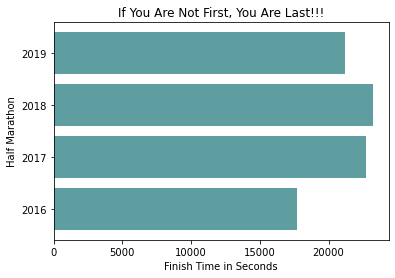

In [28]:
def time_to_sec(time_str):
    return sum(x * int(t) for x, t in zip([1, 60, 3600], reversed(time_str.split(":"))))

fig, ax = plt.subplots()

tasks = ('2016', '2017','2018','2019')
time_spent = half_last
timesec = []
for i in range(4):
    timesec.append(time_to_sec(time_spent[i]))
y_pos = np.arange(len(tasks))
error = np.random.rand(len(tasks))

ax.barh(y_pos, timesec, xerr=error, align='center', color='cadetblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(tasks)
ax.set_xlabel('Finish Time in Seconds')
ax.set_ylabel('Half Marathon')
ax.get_xaxis().set_visible(True)
ax.set_title("If You Are Not First, You Are Last!!!")
